### Question 1 Part a

In [9]:
infant <- read.csv("InfantMortality.csv")

In [10]:
head(infant)

,Mortality,Year
,<dbl>,<int>
1,85.8,1920
2,64.6,1930
3,47.0,1940
4,29.2,1950
5,26.0,1960
6,20.0,1970


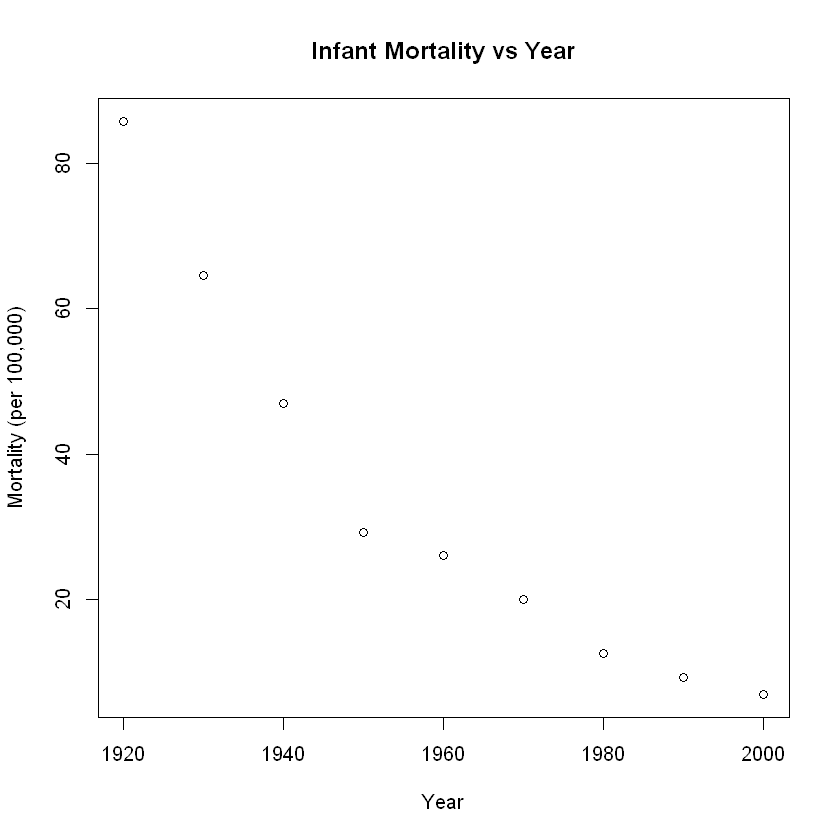

In [11]:
plot(infant$Year, infant$Mortality,
     main="Infant Mortality vs Year",
     xlab="Year", ylab="Mortality (per 100,000)")


Call:
lm(formula = log(Mortality) ~ Year, data = infant)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.139593 -0.031867 -0.003877  0.023107  0.113316 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 65.0699354  1.8910455   34.41 4.54e-09 ***
Year        -0.0315673  0.0009647  -32.72 6.44e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07473 on 7 degrees of freedom
Multiple R-squared:  0.9935,	Adjusted R-squared:  0.9926 
F-statistic:  1071 on 1 and 7 DF,  p-value: 6.444e-09


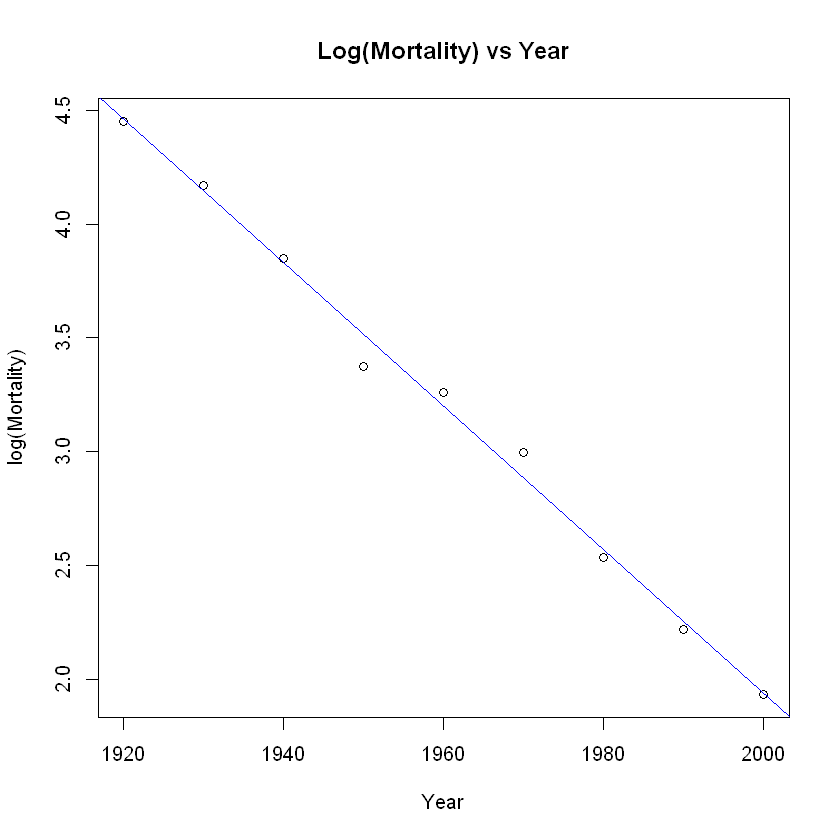

In [12]:
fit_logY <- lm(log(Mortality) ~ Year, data=infant)
summary(fit_logY)

plot(infant$Year, log(infant$Mortality),
     main="Log(Mortality) vs Year",
     xlab="Year", ylab="log(Mortality)")
abline(fit_logY, col="blue")

<span style="color: blue;">$$\log(\text{Mortality}) = 65.07 - 0.0316 \cdot \text{Year}$$<span>

### Question 1 Part b

In [20]:
newdata <- data.frame(Year = 2009)
pred_log <- predict(fit_logY, newdata)

pred_mortality <- exp(pred_log)
pred_mortality

1 
5.213716

### Question 2

In [19]:
satgpa <- read.csv("SATGPA.csv")

fit <- lm(GPA ~ VerbalSAT, data = satgpa)

summary(fit)


Call:
lm(formula = GPA ~ VerbalSAT, data = satgpa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62002 -0.25932  0.03885  0.20502  0.51621 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.6042036  0.4377919   5.948  5.5e-06 ***
VerbalSAT   0.0009056  0.0007659   1.182     0.25    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3154 on 22 degrees of freedom
Multiple R-squared:  0.05976,	Adjusted R-squared:  0.01702 
F-statistic: 1.398 on 1 and 22 DF,  p-value: 0.2496


<span style="color: blue;">I used a linear regression t-test on the slope to check if VerbalSAT is linearly related to GPA. The hypotheses were 

<span style="color: blue;">H0: β1 = 0 (no linear relationship) 

<span style="color: blue;">Ha: β1 ≠ 0 (linear relationship). 

<span style="color: blue;">From the regression output, the test statistic for VerbalSAT is t = 1.182 with a p-value of 0.25. Since the p-value is much larger than 0.05, we fail to reject the null hypothesis. There is not enough evidence to conclude that VerbalSAT and GPA are linearly related for this sample of students.<span>

### Question 3 Part a

<span style="color: blue;">The estimated slope is 1.92. This means that, on average, for each additional minute of walking time on a hike, the elevation gain increases by about 1.92 feet.<span>

### Question 3 Part b

In [23]:
b <- 1.9195
se <- 0.6253

df <- 72 - 2
alpha <- 0.10
t_crit <- qt(1 - alpha/2, df)

lower <- b - t_crit * se
upper <- b + t_crit * se

c(lower, upper)

[1] 0.8771784 2.9618216

### Question 3 Part c

<span style="color: blue;">R^2 = 0.119, which means that about 11.9% of the variability in elevation gain among these hikes can be explained by the walking time. The remaining 88.1% of the variation is due to other factors not included in the model.<span>

### Question 4 Model A

<span style="color: blue;">Linearity: The residuals have a strong curvature with the middle section all being below 0 -> Problematic.

<span style="color: blue;">Equal variance: The spread of residuals doesn't look constant across fitted values -> Problematic.

<span style="color: blue;">Normality: We can’t judge normality from a residual vs. fitted plot; we would need a Q-Q plot or histogram -> Can’t judge.

<span style="color: blue;">Independence: A residual vs. fitted plot does not show correlation over time/order -> Can’t judge.

### Question 4 Model B

<span style="color: blue;">Linearity: This plot is for normality, not for checking linearity → Can’t judge.

<span style="color: blue;">Equal variance: Equal variance can't be seen from a Q-Q plot → Can’t judge.

<span style="color: blue;">Normality: The points follow the line in the middle, but at the right and left ends, it curves up → Problematic.

<span style="color: blue;">Independence: Can’t be assessed from a Q-Q plot → Can’t judge.

### Question 5

<span style="color: blue;">Goal:
$$
\frac{\widehat\beta_1}{\operatorname{SE}(\widehat\beta_1)}
= \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}.
$$

<span style="color: blue;">Step 1. Define sums of squares:
$$
S_{xx} = \sum_{i}(x_i-\bar x)^2, \quad
S_{yy} = \sum_{i}(y_i-\bar y)^2, \quad
S_{xy} = \sum_{i}(x_i-\bar x)(y_i-\bar y).
$$

<span style="color: blue;">Step 2. Define correlation and slope:
$$
r = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}, \quad
\widehat\beta_1 = \frac{S_{xy}}{S_{xx}}.
$$

<span style="color: blue;">Step 3. Error variance and SE of slope:
$$
s_e^2 = \frac{\text{SSE}}{n-2}
= \frac{S_{yy} - \widehat\beta_1 S_{xy}}{n-2},
$$
$$
\operatorname{SE}(\widehat\beta_1) = \sqrt{\frac{s_e^2}{S_{xx}}}.
$$

<span style="color: blue;">Step 4. t-statistic for slope:
$$
t = \frac{\widehat\beta_1}{\operatorname{SE}(\widehat\beta_1)}
= \frac{\widehat\beta_1 \sqrt{S_{xx}}}{s_e}.
$$

<span style="color: blue;">Step 5. Substitute definitions:
$$
t = \frac{\tfrac{S_{xy}}{S_{xx}} \sqrt{S_{xx}}}
{\sqrt{\dfrac{S_{yy} - \tfrac{S_{xy}^2}{S_{xx}}}{n-2}}}
= \frac{S_{xy}\sqrt{n-2}}{\sqrt{S_{xx}S_{yy} - S_{xy}^2}}.
$$

<span style="color: blue;">Step 6. Replace $S_{xy} = r\sqrt{S_{xx}S_{yy}}$:
$$
t = \frac{r\sqrt{S_{xx}S_{yy}} \sqrt{n-2}}
{\sqrt{S_{xx}S_{yy}(1-r^2)}}.
$$

<span style="color: blue;">Final Result:
$$
t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}.
$$
